In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils

In [2]:
def get_simulation_metafile_path(Wa_p, kr, gamma, resolution, kinetics="butler_volmer"):
    return os.path.join("output/reaction_distribution/40-40-75", str(resolution), kinetics, f"0.001-{Wa_p}-{kr}", str(gamma), "simulation.json")

In [3]:
def read_simulation_metafile(metafile_path):
    with open(metafile_path, "r") as fp:
        return json.load(fp)

In [4]:
df_rows = []
wagner_nums = [0.01, 0.1, 1.0, 10.0, 100.0]
krs = [0.01, 1.0, 100.0]

for Wa_p in wagner_nums:
    for kr in krs:
        sim_metafile = get_simulation_metafile_path(resolution=1.0, kr=kr, Wa_p=Wa_p, gamma=15)
        try:
            row_data = read_simulation_metafile(sim_metafile)
        except FileNotFoundError:
            continue
        df_rows.append(row_data)

df = pd.DataFrame(df_rows, dtype=float)

In [5]:
# df.head()
df.columns

Index(['Negative Wagner Number', 'Positive Wagner Number',
       'Negative Overpotential [V]', 'Positive Overpotential [V]',
       'Open Circuit Potential (OCP) [V]', 'Voltage',
       'interior penalty (gamma)', 'interior penalty kr-modified (gamma)',
       'ionic to electronic conductivity ratio (kr)',
       'average potential left [V]', 'stdev potential left [V]',
       'average potential right [V]', 'stdev potential right [V]',
       'Superficial current density [A/m2]',
       'Current at negative am - electrolyte boundary [A]',
       'Current at electrolyte - positive am boundary [A]',
       'Current at right boundary [A]', 'Current at insulated boundary [A]',
       'stdev i positive charge transfer [A/m2]',
       'stdev i positive charge transfer (normalized)', 'solver atol',
       'solver rtol', 'Total resistance [Ω.cm2]'],
      dtype='object')

In [6]:
utils.make_dir_if_missing("figures/secondary_current/")

### $\frac{\kappa}{\sigma}$ = 0.01

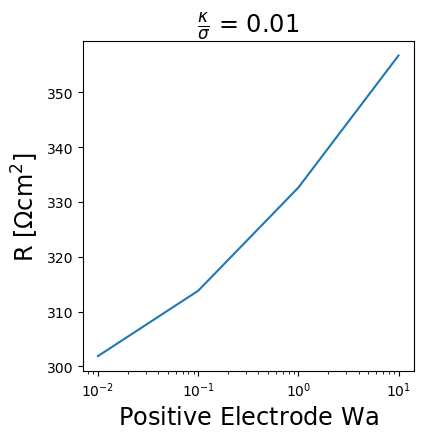

In [17]:
df_001 = df[np.isclose(df["ionic to electronic conductivity ratio (kr)"], 0.01)]
fig, ax = plt.subplots(figsize=(5, 4.5))
ax.plot(df_001['Positive Wagner Number'], df_001['Total resistance [Ω.cm2]'])
ax.set_box_aspect(1)
ax.semilogx()
ax.set_ylabel(r'R [$\Omega\mathrm{cm}^2$]', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel(r'$\mathrm{Positive\ Electrode\ Wa}$', fontdict={'fontsize': 'xx-large'})
ax.set_title(r'$\frac{\kappa}{\sigma}$ = 0.01', fontdict={'fontsize': 'xx-large'})
plt.tight_layout()
plt.savefig(f'figures/secondary_current/resistance-kr0.01.png', bbox_inches="tight")

### $\frac{\kappa}{\sigma}$ = 1

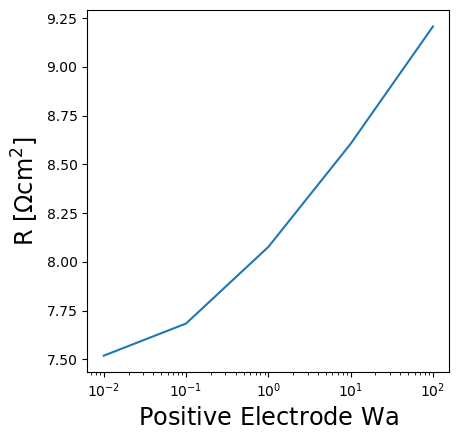

In [11]:
df_1 = df[np.isclose(df["ionic to electronic conductivity ratio (kr)"], 1)]
fig, ax = plt.subplots(figsize=(5, 4.5))
ax.plot(df_1['Positive Wagner Number'], df_1['Total resistance [Ω.cm2]'])
ax.set_box_aspect(1)
ax.set_ylabel(r'R [$\Omega\mathrm{cm}^2$]', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel(r'$\mathrm{Positive\ Electrode\ Wa}$', fontdict={'fontsize': 'xx-large'})
ax.semilogx()
ax.set_title(r'$\frac{\kappa}{\sigma}$ = 1', fontdict={'fontsize': 'xx-large'})
plt.tight_layout()
plt.savefig(f'figures/secondary_current/resistance-kr1.png', bbox_inches="tight")

### $\frac{\kappa}{\sigma}$ = 100

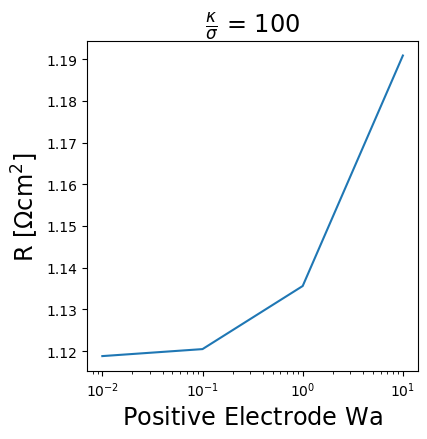

In [16]:
df_100 = df[np.isclose(df["ionic to electronic conductivity ratio (kr)"], 100)]
fig, ax = plt.subplots(figsize=(5, 4.5))
ax.plot(df_100['Positive Wagner Number'], df_100['Total resistance [Ω.cm2]'])
ax.set_box_aspect(1)
ax.set_ylabel(r'R [$\Omega\mathrm{cm}^2$]', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel(r'$\mathrm{Positive\ Electrode\ Wa}$', fontdict={'fontsize': 'xx-large'})
ax.semilogx()
ax.set_title(r'$\frac{\kappa}{\sigma}$ = 100', fontdict={'fontsize': 'xx-large'})
plt.tight_layout()
plt.savefig(f'figures/secondary_current/resistance-kr100.png', bbox_inches="tight")

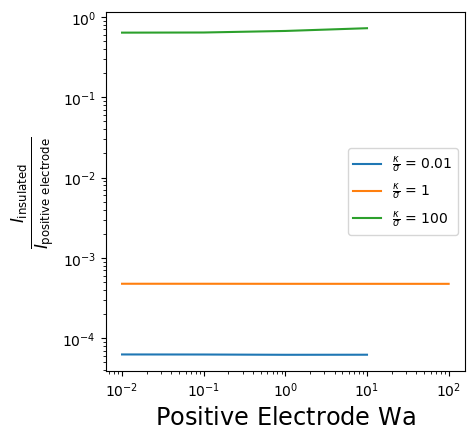

In [23]:
fig, ax = plt.subplots(figsize=(5, 4.5))
ax.plot(df_001['Positive Wagner Number'], df_001['Current at insulated boundary [A]']/df_001['Current at right boundary [A]'], label=r'$\frac{\kappa}{\sigma}$ = 0.01')
ax.plot(df_1['Positive Wagner Number'], df_1['Current at insulated boundary [A]']/df_1['Current at right boundary [A]'], label=r'$\frac{\kappa}{\sigma}$ = 1')
ax.plot(df_100['Positive Wagner Number'], df_100['Current at insulated boundary [A]']/df_100['Current at right boundary [A]'], label=r'$\frac{\kappa}{\sigma}$ = 100')
ax.legend()
ax.semilogx()
ax.semilogy()
ax.set_box_aspect(1)
ax.set_ylabel(r'$\frac{I_{\mathrm{insulated}}}{I_{\mathrm{positive\ electrode}}}$', fontdict={'fontsize': 'xx-large'})
ax.set_xlabel(r'$\mathrm{Positive\ Electrode\ Wa}$', fontdict={'fontsize': 'xx-large'})
# ax.set_title(r'$\frac{\kappa}{\sigma}$ = 100', fontdict={'fontsize': 'xx-large'})
plt.tight_layout()
plt.savefig(f'figures/secondary_current/convergence.png', bbox_inches="tight")